# 6 - Sensitivity Analysis v2

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [2]:
MATERIALS = ['glass','silver','silicon', 'copper','aluminium']
MATERIAL = MATERIALS[0]

MODULEBASELINE = r'..\baselines\baseline_modules_US.csv' 
MATERIALBASELINE = r'..\baselines\baseline_material_'+MATERIAL+'.csv'


In [3]:
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [5]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='baseline', file=MODULEBASELINE)
r1.scenario['baseline'].addMaterial(MATERIAL, file=MATERIALBASELINE)


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


### Change VAlues to 50:


In [6]:
## Change VAlues to 50:
'''
mat_virgin_eff	mat_massperm2	mat_MFG_eff	mat_MFG_scrap_Recycled	mat_MFG_scrap_Recycling_eff	mat_MFG_scrap_Recycled_into_HQ	mat_MFG_scrap_Recycled_into_HQ_Reused4MFG	mat_EOL_collected_Recycled	mat_EOL_Recycling_eff	mat_EOL_Recycled_into_HQ	mat_EOL_RecycledHQ_Reused4MFG
mod_MFG_eff	mod_EOL_collection_eff	mod_EOL_collected_recycled	mod_Repowering	mod_Repairing
mod_lifetime = 25
mod_reliability_t50 = 31
mod_reliability_t90 = 36
od_degradation = 0.6
''';


### Load Scenarios and Parameters

In [7]:
ss = pd.read_excel(r'..\..\tests\sensitivity_test.xlsx')
ss

,Modification,Database,stage,variables,High,Low,AbsRel
0,single,material,mat_virgin_eff,mat_virgin_eff,10,-10,abs
1,single,material,mat_massperm2,mat_massperm2,10,-10,rel
2,single,material,mat_MFG_eff,mat_MFG_eff,10,-10,abs
3,single,material,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycled,10,-10,abs
4,single,material,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycling_eff,10,-10,abs
5,single,material,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ,10,-10,abs
6,single,material,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,10,-10,abs
7,multiple,material,mat_MFG_Scrap_Overall_Improvement,"mat_MFG_scrap_Recycled, mat_MFG_scrap_Recyclin...",10,-10,abs
8,single,material,mat_EOL_collected_Recycled,mat_EOL_collected_Recycled,10,-10,abs
9,single,material,mat_EOL_Recycling_eff,mat_EOL_Recycling_eff,10,-10,abs


#### Create Scenarios

In [8]:
i=0
stage = ss['stage'][i]
stage_highname = stage+'_high'
stage_lowname = stage+'_low'


In [9]:
ss['variables'][i]

'mat_virgin_eff'

In [10]:
ss['Modification'][i]

'single'

In [11]:
ss['AbsRel'][i]

'abs'

In [12]:
r1.createScenario(name=stage_highname, file=MODULEBASELINE)
r1.scenario[stage_highname].addMaterial(MATERIAL, file=MATERIALBASELINE)
r1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]] = r1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]] + ss['High'][i]

            #df[df > 9] = 11

In [13]:
r1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]]

0     109.9
1     109.9
2     109.9
3     109.9
4     109.9
5     109.9
6     109.9
7     109.9
8     109.9
9     109.9
10    109.9
11    109.9
12    109.9
13    109.9
14    109.9
15    109.9
16    109.9
17    109.9
18    109.9
19    109.9
20    109.9
21    109.9
22    109.9
23    109.9
24    109.9
25    109.9
26    109.9
27    109.9
28    109.9
29    109.9
30    109.9
31    109.9
32    109.9
33    109.9
34    109.9
35    109.9
36    109.9
37    109.9
38    109.9
39    109.9
40    109.9
41    109.9
42    109.9
43    109.9
44    109.9
45    109.9
46    109.9
47    109.9
48    109.9
49    109.9
50    109.9
51    109.9
52    109.9
53    109.9
54    109.9
55    109.9
Name: mat_virgin_eff, dtype: float64

In [14]:
r1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]][r1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]]>100.0] =100.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
r1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]]

0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
5     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    100.0
12    100.0
13    100.0
14    100.0
15    100.0
16    100.0
17    100.0
18    100.0
19    100.0
20    100.0
21    100.0
22    100.0
23    100.0
24    100.0
25    100.0
26    100.0
27    100.0
28    100.0
29    100.0
30    100.0
31    100.0
32    100.0
33    100.0
34    100.0
35    100.0
36    100.0
37    100.0
38    100.0
39    100.0
40    100.0
41    100.0
42    100.0
43    100.0
44    100.0
45    100.0
46    100.0
47    100.0
48    100.0
49    100.0
50    100.0
51    100.0
52    100.0
53    100.0
54    100.0
55    100.0
Name: mat_virgin_eff, dtype: float64

In [16]:
for i in range (0, len(ss)):
    stage = ss['stage'][i]
    stage_highname = stage+'_high'
    stage_lowname = stage+'_low'
    
    if ss['Database'][i] == 'material':

        if ss['Modification'][i] == 'single':

            # Create Scenarios
            r1.createScenario(name=stage_highname, file=MODULEBASELINE)
            r1.scenario[stage_highname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            r1.createScenario(name=stage_lowname, file=MODULEBASELINE)
            r1.scenario[stage_lowname].addMaterial(MATERIAL, file=MATERIALBASELINE)

            # Modify Values Absolute
            if ss['AbsRel'][i] == 'abs':
                # Modify Values High
                r1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]] = r1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]] + ss['High'][i]
                r1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]][r1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]]>100.0] =100.0
                # Modify Values Low
                r1.scenario[stage_lowname].material[MATERIAL].materialdata[ss['variables'][i]] = r1.scenario[stage_lowname].material[MATERIAL].materialdata[ss['variables'][i]] + ss['Low'][i]
                r1.scenario[stage_lowname].material[MATERIAL].materialdata[ss['variables'][i]][r1.scenario[stage_lowname].material[MATERIAL].materialdata[ss['variables'][i]]<0.0] = 0.0

            # Modify Values Relative
            if ss['AbsRel'][i] == 'rel':
                # Modify Values High
                high_change = 1+ss['High'][i]/100.0
                low_change = 1+ss['Low'][i]/100.0
                r1.scenario[stage_highname].material[MATERIAL].materialdata = PV_ICE.sens_StageImprovement(r1.scenario[stage_highname].material[MATERIAL].materialdata, 
                             stage=ss['variables'][i], improvement=high_change, start_year=0)
                # Modify Values Low
                r1.scenario[stage_lowname].material[MATERIAL].materialdata = PV_ICE.sens_StageImprovement(r1.scenario[stage_lowname].material[MATERIAL].materialdata, 
                             stage=ss['variables'][i], improvement=low_change, start_year=0)
          
        # If multiple, assumed all modifications are ABSOLUTE
        if ss['Modification'][i] == 'multiple':
            vars = [x.strip() for x in ss['variables'][i].split(',')]
            
            # Create Scenarios
            r1.createScenario(name=stage_highname, file=MODULEBASELINE)
            r1.scenario[stage_highname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            r1.createScenario(name=stage_lowname, file=MODULEBASELINE)
            r1.scenario[stage_lowname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            
            for j in range(0, len(vars)):
                # Modify Values High
                r1.scenario[stage_highname].material[MATERIAL].materialdata[vars[j]] = r1.scenario[stage_highname].material[MATERIAL].materialdata[vars[j]] + ss['High'][i] 
                r1.scenario[stage_highname].material[MATERIAL].materialdata[vars[j]][r1.scenario[stage_highname].material[MATERIAL].materialdata[vars[j]]>100.0] =100.0
                # Modify Values Low
                r1.scenario[stage_lowname].material[MATERIAL].materialdata[vars[j]] = r1.scenario[stage_lowname].material[MATERIAL].materialdata[vars[j]] + ss['Low'][i]
                r1.scenario[stage_lowname].material[MATERIAL].materialdata[vars[j]][r1.scenario[stage_lowname].material[MATERIAL].materialdata[vars[j]]<0.0] = 0.0

        
    if ss['Database'][i] == 'module':
        
        
        if ss['Modification'][i] == 'single':

            # Create Scenarios
            r1.createScenario(name=stage_highname, file=MODULEBASELINE)
            r1.scenario[stage_highname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            r1.createScenario(name=stage_lowname, file=MODULEBASELINE)
            r1.scenario[stage_lowname].addMaterial(MATERIAL, file=MATERIALBASELINE) 
            # Modify Values Absolute
            if ss['AbsRel'][i] == 'abs':


                r1.scenario[stage_highname].data[ss['variables'][i]] = r1.scenario[stage_highname].data[ss['variables'][i]] + ss['High'][i]
                r1.scenario[stage_highname].data[ss['variables'][i]][r1.scenario[stage_highname].data[ss['variables'][i]]>100.0] =100.0


                r1.scenario[stage_lowname].data[ss['variables'][i]] = r1.scenario[stage_lowname].data[ss['variables'][i]] + ss['Low'][i]
                r1.scenario[stage_lowname].data[ss['variables'][i]][r1.scenario[stage_lowname].data[ss['variables'][i]]<0.0] = 0.0

            # Modify Values Relative
            if ss['AbsRel'][i] == 'rel':
                high_change = 1+ss['High'][i]/100.0
                low_change = 1+ss['Low'][i]/100.0
                r1.scenario[stage_highname].data = PV_ICE.sens_StageImprovement(r1.scenario[stage_highname].data, 
                                                 stage=ss['variables'][i], improvement=high_change, start_year=0)
                r1.scenario[stage_lowname].data = PV_ICE.sens_StageImprovement(r1.scenario[stage_lowname].data, 
                                                 stage=ss['variables'][i], improvement=low_change, start_year=0)
        
        # If multiple, assumed all modifications are ABSOLUTE
        if ss['Modification'][i] == 'multiple':
            vars = [x.strip() for x in ss['variables'][i].split(',')]

            r1.createScenario(name=stage_highname, file=MODULEBASELINE)
            r1.scenario[stage_highname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            r1.createScenario(name=stage_lowname, file=MODULEBASELINE)
            r1.scenario[stage_lowname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            
            for j in range(0, len(vars)):
                r1.scenario[stage_highname].data[vars[j]] = r1.scenario[stage_highname].data[vars[j]] + ss['High'][i] 
                r1.scenario[stage_highname].data[vars[j]][r1.scenario[stage_highname].data[vars[j]]>100.0] =100.0

                r1.scenario[stage_lowname].data[vars[j]] = r1.scenario[stage_lowname].data[vars[j]] + ss['Low'][i]
                r1.scenario[stage_lowname].data[vars[j]][r1.scenario[stage_lowname].data[vars[j]]<0.0] = 0.0

        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

# MASS FLOWS

In [17]:
r1.calculateMassFlow()


Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycl

In [18]:
r1.scenario['baseline'].material['glass'].materialdata.head()

,year,mat_virgin_eff,mat_massperm2,mat_MFG_eff,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_EOL_collected_Recycled,mat_EOL_Recycling_eff,...,mat_MFG_Recycled_into_HQ,mat_MFG_Recycled_into_OQ,mat_MFG_Recycled_HQ_into_MFG,mat_MFG_Recycled_HQ_into_OU,mat_Virgin_Stock,mat_Virgin_Stock_Raw,mat_Total_EOL_Landfilled,mat_Total_MFG_Landfilled,mat_Total_Landfilled,mat_Total_Recycled_OU
0,1995,99.9,8000.0,95.0,80.0,50.0,20.0,10.0,90.0,40.0,...,4.743287e+06,1.897315e+07,474328.678840,4.268958e+06,8.588168e+08,8.596764e+08,0.000000e+00,3.557465e+07,3.557465e+07,2.324211e+07
1,1996,99.9,8000.0,95.0,80.0,50.0,20.0,10.0,90.0,40.0,...,3.610749e+06,1.444300e+07,361074.925797,3.249674e+06,6.537602e+08,6.544146e+08,6.705091e+03,2.708062e+07,2.708732e+07,1.769282e+07
2,1997,99.9,8000.0,95.0,80.0,50.0,20.0,10.0,90.0,40.0,...,4.280006e+06,1.712002e+07,428000.613779,3.852006e+06,7.749354e+08,7.757111e+08,1.260574e+05,3.210005e+07,3.222610e+07,2.097478e+07
3,1998,99.9,8000.0,95.0,80.0,50.0,20.0,10.0,90.0,40.0,...,4.278764e+06,1.711506e+07,427876.429205,3.850888e+06,7.747104e+08,7.754859e+08,7.486167e+05,3.209073e+07,3.283935e+07,2.098227e+07
4,1999,99.9,8000.0,95.0,80.0,50.0,20.0,10.0,90.0,40.0,...,6.049004e+06,2.419602e+07,604900.425546,5.444104e+06,1.095228e+09,1.096325e+09,2.677158e+06,4.536753e+07,4.804469e+07,2.969851e+07


In [19]:
r1.scenario['mat_massperm2_high'].material['glass'].materialdata.head()

,year,mat_virgin_eff,mat_massperm2,mat_MFG_eff,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_EOL_collected_Recycled,mat_EOL_Recycling_eff,...,mat_MFG_Recycled_into_HQ,mat_MFG_Recycled_into_OQ,mat_MFG_Recycled_HQ_into_MFG,mat_MFG_Recycled_HQ_into_OU,mat_Virgin_Stock,mat_Virgin_Stock_Raw,mat_Total_EOL_Landfilled,mat_Total_MFG_Landfilled,mat_Total_Landfilled,mat_Total_Recycled_OU
0,1995,99.9,8000.0,95.0,80.0,50.0,20.0,10.0,90.0,40.0,...,4.743287e+06,1.897315e+07,474328.678840,4.268958e+06,8.588168e+08,8.596764e+08,0.000000e+00,3.557465e+07,3.557465e+07,2.324211e+07
1,1996,99.9,8800.0,95.0,80.0,50.0,20.0,10.0,90.0,40.0,...,3.971824e+06,1.588730e+07,397182.418377,3.574642e+06,7.191362e+08,7.198560e+08,6.705091e+03,2.978868e+07,2.979539e+07,1.946208e+07
2,1997,99.9,8800.0,95.0,80.0,50.0,20.0,10.0,90.0,40.0,...,4.708007e+06,1.883203e+07,470800.675157,4.237206e+06,8.524289e+08,8.532822e+08,1.265679e+05,3.531005e+07,3.543662e+07,2.307199e+07
3,1998,99.9,8800.0,95.0,80.0,50.0,20.0,10.0,90.0,40.0,...,4.706641e+06,1.882656e+07,470664.072125,4.235977e+06,8.521814e+08,8.530345e+08,7.578245e+05,3.529981e+07,3.605763e+07,2.307907e+07
4,1999,99.9,8800.0,95.0,80.0,50.0,20.0,10.0,90.0,40.0,...,6.653905e+06,2.661562e+07,665390.468101,5.988514e+06,1.204751e+09,1.205957e+09,2.727171e+06,4.990429e+07,5.263146e+07,3.266362e+07


In [20]:
scenarios = list(r1.scenario.keys())
scenarios

['baseline',
 'mat_virgin_eff_high',
 'mat_virgin_eff_low',
 'mat_massperm2_high',
 'mat_massperm2_low',
 'mat_MFG_eff_high',
 'mat_MFG_eff_low',
 'mat_MFG_scrap_Recycled_high',
 'mat_MFG_scrap_Recycled_low',
 'mat_MFG_scrap_Recycling_eff_high',
 'mat_MFG_scrap_Recycling_eff_low',
 'mat_MFG_scrap_Recycled_into_HQ_high',
 'mat_MFG_scrap_Recycled_into_HQ_low',
 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_high',
 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_low',
 'mat_MFG_Scrap_Overall_Improvement_high',
 'mat_MFG_Scrap_Overall_Improvement_low',
 'mat_EOL_collected_Recycled_high',
 'mat_EOL_collected_Recycled_low',
 'mat_EOL_Recycling_eff_high',
 'mat_EOL_Recycling_eff_low',
 'mat_EOL_Recycled_into_HQ_high',
 'mat_EOL_Recycled_into_HQ_low',
 'mat_EOL_RecycledHQ_Reused4MFG_high',
 'mat_EOL_RecycledHQ_Reused4MFG_low',
 'mat_EOL_Recycling_Overall_Improvement_high',
 'mat_EOL_Recycling_Overall_Improvement_low',
 'new_Installed_Capacity_[MW]_high',
 'new_Installed_Capacity_[MW]_low',
 'mod_eff_h

#### Compile Changes

In [ ]:
installs_keyword = 'Installed_Capacity_[W]'

In [27]:
import matplotlib.pyplot as plt

In [41]:
r1.scenario['baseline'].data.head()

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,...,EOL_on_Year_50,EOL_on_Year_51,EOL_on_Year_52,EOL_on_Year_53,EOL_on_Year_54,EOL_on_Year_55,EoL_Collected,EoL_NotCollected,EoL_Recycled,EoL_NotRecycled_Landfilled
0,1995,12.500000,12.50,15.0,20.0,0.55,10.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1996,9.667667,12.70,15.0,20.0,0.55,10.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.128496,0.728144,0.051398,0.077098
2,1997,11.622000,12.88,19.0,23.0,0.55,15.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.415757,13.689292,0.966303,1.449454
3,1998,11.781000,13.06,19.0,23.0,0.55,15.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.346446,81.296529,5.738579,8.607868
4,1999,16.884667,13.24,19.0,23.0,0.55,15.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,51.304889,290.727705,20.521956,30.782933


In [40]:
r1.scenario['reliability_high'].data.head()

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,...,EOL_on_Year_50,EOL_on_Year_51,EOL_on_Year_52,EOL_on_Year_53,EOL_on_Year_54,EOL_on_Year_55,EoL_Collected,EoL_NotCollected,EoL_Recycled,EoL_NotRecycled_Landfilled
0,1995,12.500000,12.50,25.0,30.0,0.55,20.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1996,9.667667,12.70,25.0,30.0,0.55,20.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,0.000037,0.000003,0.000004
2,1997,11.622000,12.88,29.0,33.0,0.55,25.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000627,0.003554,0.000251,0.000376
3,1998,11.781000,13.06,29.0,33.0,0.55,25.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.009459,0.053602,0.003784,0.005675
4,1999,16.884667,13.24,29.0,33.0,0.55,25.0,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.066575,0.377260,0.026630,0.039945


In [42]:
r1.scenario['reliability_high'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Cumulative_Active_Area',
       'Installed_Capacity_[W]', 'WeibullParams', 'EOL_on_Year_0',
       'EOL_on_Year_1', 'EOL_on_Year_2', 'EOL_on_Year_3', 'EOL_on_Year_4',
       'EOL_on_Year_5', 'EOL_on_Year_6', 'EOL_on_Year_7', 'EOL_on_Year_8',
       'EOL_on_Year_9', 'EOL_on_Year_10', 'EOL_on_Year_11', 'EOL_on_Year_12',
       'EOL_on_Year_13', 'EOL_on_Year_14', 'EOL_on_Year_15', 'EOL_on_Year_16',
       'EOL_on_Year_17', 'EOL_on_Year_18', 'EOL_on_Year_19', 'EOL_on_Year_20',
       'EOL_on_Year_21', 'EOL_on_Year_22', 'EOL_on_Year_23', 'EOL_on_Year_24',
       'EOL_on_Year_25', 'EOL_on_Yea

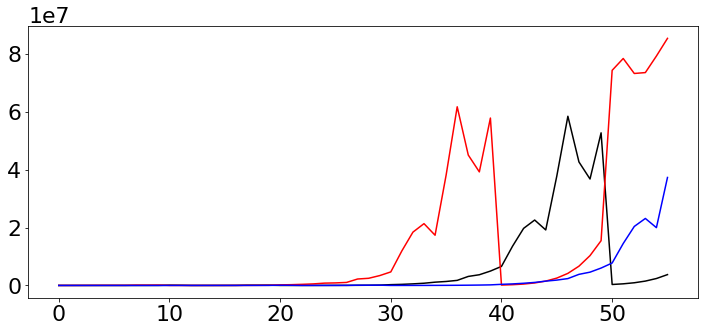

In [37]:
plt.plot(r1.scenario['baseline'].data['Cumulative_Area_disposed'],'k')
plt.plot(r1.scenario['reliability_low'].data['Cumulative_Area_disposed'],'r')
plt.plot(r1.scenario['reliability_high'].data['Cumulative_Area_disposed'],'b')

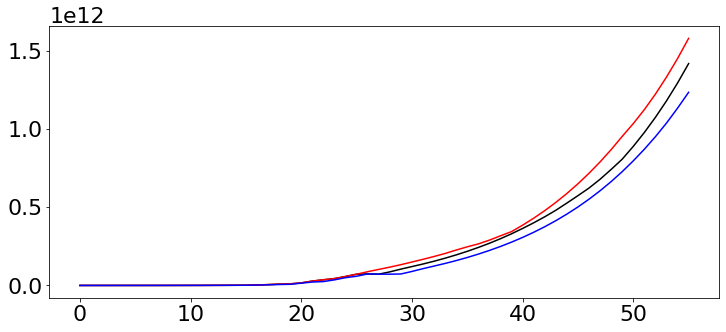

In [39]:
plt.plot(r1.scenario['baseline'].data['Installed_Capacity_[W]'],'k')
plt.plot(r1.scenario['reliability_low'].data['Installed_Capacity_[W]'],'r')
plt.plot(r1.scenario['reliability_high'].data['Installed_Capacity_[W]'],'b')

In [ ]:
plt.plot(r1.scenario['baseline'].data['Installed_Capacity_[W]'],'k')
plt.plot(r1.scenario['reliability_high'].data['Installed_Capacity_[W]'],'r')

In [21]:
virginStock_Changes = []
waste_Changes = []
installedCapacity_Changes = []
virginStockRAW_Changes = []

virgin_keyword = 'mat_Virgin_Stock'
waste_keyword = 'mat_Total_Landfilled'
installs_keyword = 'Installed_Capacity_[W]'
viring_raw_keyword = 'mat_Virgin_Stock_Raw'

virginStock_baseline_cum2050 = r1.scenario['baseline'].material[MATERIAL].materialdata[virgin_keyword].sum()
virginStockRAW_baseline_cum2050 = r1.scenario['baseline'].material[MATERIAL].materialdata[viring_raw_keyword].sum()

waste_baseline_cum2050 = r1.scenario['baseline'].material[MATERIAL].materialdata[waste_keyword].sum()
installedCapacity_baselined_2050 = r1.scenario['baseline'].data[installs_keyword].iloc[-1]

for i in range (1, len(scenarios)):
    stage_name = scenarios[i]
    virginStock_Changes.append(round(100*r1.scenario[stage_name].material[MATERIAL].materialdata[virgin_keyword].sum()/virginStock_baseline_cum2050,5)-100)
    virginStockRAW_Changes.append(round(100*r1.scenario[stage_name].material[MATERIAL].materialdata[viring_raw_keyword].sum()/virginStockRAW_baseline_cum2050,5)-100)

    waste_Changes.append(round(100*r1.scenario[stage_name].material[MATERIAL].materialdata[waste_keyword].sum()/waste_baseline_cum2050,5)-100)
    installedCapacity_Changes.append(round(100*r1.scenario[stage_name].data[installs_keyword].iloc[-1]/installedCapacity_baselined_2050,5)-100)

In [22]:
stages = scenarios[1::] # removing baseline as we want a dataframe with only changes

In [23]:
df = pd.DataFrame(list(zip(virginStock_Changes, virginStockRAW_Changes, waste_Changes, installedCapacity_Changes)), 
               columns=['Virgin Needs Change', 'Virgin Stock Raw Change', 'Waste Change', 'InstalledCapacity Change'],index=stages) 

In [24]:
variables_description = {'mat_virgin_eff': "Material Virgin Efficiency",
    'mat_massperm2': "Mass per m2",
    'mat_MFG_eff': "Efficiency of Material Use during Module Manufacturing",
    'mat_MFG_scrap_Recycled': "% of Material Scrap from Manufacturing that undergoes Recycling",
    'mat_MFG_scrap_Recycling_eff': "Recycling Efficiency of the Material Scrap",
    'mat_MFG_scrap_Recycling_eff': "% of Recycled Material Scrap that is high quality",
    'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG': "% of high quality Recycled Material Scrap reused for manufacturing",
    'new_Installed_Capacity_[MW]': "New Installed Capacity",
    'mod_eff': "Module Efficiency",
    'mod_EOL_collection_eff': "Collection Efficiency of EoL Modules",
    'mod_EOL_collected_recycled': "% of collected modules that are recycled",
    'mod_Repowering': "% of EOL modules that are repowered",
    'mod_Repairing' : "% of failed modules that undergo repair",
    'mat_EOL_collected_Recycled': "% of times material is chosen to be recycled",
    'mat_EOL_Recycling_eff': "Efficiency of material recycling",
    'mat_EOL_Recycled_into_HQ': "Fraction of recycled material that is high quality",
    'mat_EOL_RecycledHQ_Reused4MFG': "Fraction of high quality recycled material that is reused for manufacturing",
    'EOL_CE_Pathways': "Overall improvement on EoL Circularity Pathways",
    'Reliability_and_CE_Pathways': "Overall improvement on Eol Circularity Pathways + Reliability and Lifetime",
    'mat_EOL_Recycling_Overall_Improvement': "Overall Improvement on EoL Recycling Loop"}


In [25]:
df_Pos = df[['high' in s for s in df.index]].copy()
df_Pos.index = df_Pos.index.str.replace("_high", "")

col_verbose = []

for i in range (0, len(df_Pos)):
    if df_Pos.index[i] in variables_description:
        col_verbose.append(variables_description[df_Pos.index[i]])
    else:
        col_verbose.append("")
        
df_Pos['Description'] = col_verbose     
df_Pos = df_Pos.reset_index()
df_Pos = df_Pos.rename(columns={'index':'variable'})
df_Pos


,variable,Virgin Needs Change,Virgin Stock Raw Change,Waste Change,InstalledCapacity Change,Description
0,mat_virgin_eff,0.00000,-0.10000,0.00000,0.00000,Material Virgin Efficiency
1,mat_massperm2,9.99988,9.99988,9.99802,0.00000,Mass per m2
2,mat_MFG_eff,-1.25591,-1.25591,-13.00886,0.00000,Efficiency of Material Use during Module Manuf...
3,mat_MFG_scrap_Recycled,-0.00324,-0.00324,-2.77540,0.00000,% of Material Scrap from Manufacturing that un...
4,mat_MFG_scrap_Recycling_eff,-0.00519,-0.00519,-4.44064,0.00000,% of Recycled Material Scrap that is high quality
5,mat_MFG_scrap_Recycled_into_HQ,-0.01297,-0.01297,0.00000,0.00000,
6,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,-0.02593,-0.02593,0.00000,0.00000,% of high quality Recycled Material Scrap reus...
7,mat_MFG_Scrap_Overall_Improvement,-0.07909,-0.07909,-7.77112,0.00000,
8,mat_EOL_collected_Recycled,-0.00011,-0.00011,-0.16360,0.00000,% of times material is chosen to be recycled
9,mat_EOL_Recycling_eff,-0.00026,-0.00026,-0.36811,0.00000,Efficiency of material recycling


In [26]:
df_Neg = df[['low' in s for s in df.index]].copy()
df_Neg.index = df_Neg.index.str.replace("_low", "")

col_verbose = []

for i in range (0, len(df_Neg)):
    if df_Neg.index[i] in variables_description:
        col_verbose.append(variables_description[df_Neg.index[i]])
    else:
        col_verbose.append("")

df_Neg['Description'] = col_verbose
df_Neg = df_Neg.reset_index()
df_Neg = df_Neg.rename(columns={'index':'variable'})
df_Neg

,variable,Virgin Needs Change,Virgin Stock Raw Change,Waste Change,InstalledCapacity Change,Description
0,mat_virgin_eff,0.00000,11.12347,0.00000,0.00000,Material Virgin Efficiency
1,mat_massperm2,-9.99988,-9.99988,-9.99802,0.00000,Mass per m2
2,mat_MFG_eff,11.18330,11.18330,115.83823,0.00000,Efficiency of Material Use during Module Manuf...
3,mat_MFG_scrap_Recycled,0.00324,0.00324,2.77540,0.00000,% of Material Scrap from Manufacturing that un...
4,mat_MFG_scrap_Recycling_eff,0.00519,0.00519,4.44064,0.00000,% of Recycled Material Scrap that is high quality
5,mat_MFG_scrap_Recycled_into_HQ,0.01297,0.01297,0.00000,0.00000,
6,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,0.02593,0.02593,0.00000,0.00000,% of high quality Recycled Material Scrap reus...
7,mat_MFG_Scrap_Overall_Improvement,0.02593,0.02593,6.66096,0.00000,
8,mat_EOL_collected_Recycled,0.00011,0.00011,0.16360,0.00000,% of times material is chosen to be recycled
9,mat_EOL_Recycling_eff,0.00026,0.00026,0.36811,0.00000,Efficiency of material recycling


# Print Values for a Senki Diagram, 1 year

In [ ]:
mat_UsedSuccessfullyinModuleManufacturing = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_UsedSuccessfullyinModuleManufacturing'].sum()
mat_MFG_Scrap = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_MFG_Scrap'].sum()
mat_MFG_Scrap_Sentto_Recycling = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_MFG_Scrap_Sentto_Recycling'].sum()
mat_MFG_Scrap_Landfilled = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_MFG_Scrap_Landfilled'].sum()
mat_MFG_Scrap_Recycled_Successfully = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_MFG_Scrap_Recycled_Successfully'].sum()
mat_MFG_Scrap_Recycled_Losses_Landfilled = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_MFG_Scrap_Recycled_Losses_Landfilled'].sum()
mat_MFG_Recycled_into_HQ = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_MFG_Recycled_into_HQ'].sum()
mat_MFG_Recycled_into_OQ = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_MFG_Recycled_into_OQ'].sum()
mat_MFG_Recycled_HQ_into_MFG = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_MFG_Recycled_HQ_into_MFG'].sum()
mat_MFG_Recycled_HQ_into_OU = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_MFG_Recycled_HQ_into_OU'].sum()

mat_modules_NotCollected = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_modules_NotCollected'].sum()
mat_EOL_Collected = mat_UsedSuccessfullyinModuleManufacturing-mat_modules_NotCollected
mat_EOL_collected_Recycled = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_EOL_collected_Recycled'].sum()
mat_EOL_NotRecycled_Landfilled = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_EOL_NotRecycled_Landfilled'].sum()
mat_EOL_Recycled = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_EOL_Recycled'].sum()
mat_EOL_Recycled_Losses_Landfilled = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_EOL_Recycled_Losses_Landfilled'].sum()
mat_EOL_Recycled_2_HQ = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_EOL_Recycled_2_HQ'].sum()
mat_EOL_Recycled_2_OQ = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_EOL_Recycled_2_OQ'].sum()
mat_EoL_Recycled_HQ_into_MFG = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_EoL_Recycled_HQ_into_MFG'].sum()
mat_EOL_Recycled_HQ_into_OU = r1.scenario['baseline'].material[MATERIAL].materialdata['mat_EOL_Recycled_HQ_into_OU'].sum()

mat_Virgin_Stock, mat_UsedSuccessfullyinModuleManufacturing
mat_Virgin_Stock, mat_MFG_Scrap
mat_MFG_Scrap, mat_MFG_Scrap_Sentto_Recycling
mat_MFG_Scrap, mat_MFG_Scrap_Landfilled
mat_MFG_Scrap_Sentto_Recycling, mat_MFG_Scrap_Recycled_Successfully
mat_MFG_Scrap_Sentto_Recycling, mat_MFG_Scrap_Recycled_Losses_Landfilled
mat_MFG_Scrap_Recycled_Successfully, mat_MFG_Recycled_into_HQ
mat_MFG_Scrap_Recycled_Successfully, mat_MFG_Recycled_into_OQ
mat_MFG_Recycled_into_HQ, mat_MFG_Recycled_HQ_into_MFG
mat_MFG_Recycled_into_HQ, mat_MFG_Recycled_HQ_into_OU

mat_UsedSuccessfullyinModuleManufacturing, mat_modules_NotCollected
mat_UsedSuccessfullyinModuleManufacturing, (mat_UsedSuccessfullyinModuleManufacturing-mat_modules_NotCollected) # mat collected
(mat_UsedSuccessfullyinModuleManufacturing-mat_modules_NotCollected), mat_EOL_collected_Recycled
(mat_UsedSuccessfullyinModuleManufacturing-mat_modules_NotCollected), mat_EOL_NotRecycled_Landfilled
mat_EOL_collected_Recycled, mat_EOL_Recycled
mat_EOL_collected_Recycled, mat_EOL_Recycled_Losses_Landfilled
mat_EOL_Recycled, mat_EOL_Recycled_2_HQ
mat_EOL_Recycled, mat_EOL_Recycled_2_OQ
mat_EOL_Recycled_2_HQ, mat_EoL_Recycled_HQ_into_MFG
mat_EOL_Recycled_2_HQ, mat_EOL_Recycled_HQ_into_OU


In [ ]:
print(mat_UsedSuccessfullyinModuleManufacturing,', ','Virgin Stock',', ','Modules')
print(mat_MFG_Scrap,', ','Virgin Stock',', ','Manufacturing Scrap')
print(mat_MFG_Scrap_Sentto_Recycling,', ','Manufacturing Scrap',', ','Sent to Recycling')
print(mat_MFG_Scrap_Landfilled,', ','Manufacturing Scrap',', ','Waste')
print(mat_MFG_Scrap_Recycled_Successfully,', ','Sent to Recycling',', ','Recycled')
print(mat_MFG_Scrap_Recycled_Losses_Landfilled,', ','Sent to Recycling',', ','Waste')
print(mat_MFG_Recycled_into_HQ,', ','Recycled',', ','HQ')
print(mat_MFG_Recycled_into_OQ,', ','Recycled',', ','OQ')
print(mat_MFG_Recycled_HQ_into_MFG,', ','HQ',', ','HQ_Mfg')
print(mat_MFG_Recycled_HQ_into_OU,', ','HQ',', ','HQ Other Uses')

print(mat_modules_NotCollected,', ','Modules,', ',mat_modules_NotCollected')
print((mat_UsedSuccessfullyinModuleManufacturing-mat_modules_NotCollected),', ','Modules',', ','EOL Collected')
print(mat_EOL_collected_Recycled,', ','EOL Collected',', ','Sent to Recycling')
print(mat_EOL_NotRecycled_Landfilled,', ','EOL Collected',', ','Waste')
print(mat_EOL_Recycled,', ','Sent to Recycling',', ','Recycled')
print(mat_EOL_Recycled_Losses_Landfilled,', ','Sent to Recycling',', ','Waste')
print(mat_EOL_Recycled_2_HQ,', ','Recycled',', ','HQ')
print(mat_EOL_Recycled_2_OQ,', ','Recycled',', ','OQ')
print(mat_EoL_Recycled_HQ_into_MFG,', ','HQ',', ','HQ_Mfg')
print(mat_EOL_Recycled_HQ_into_OU,', ','HQ',', ','HQ Other Uses')


In [ ]:
print('Virgin Stock',',','Modules',',',mat_UsedSuccessfullyinModuleManufacturing)
print('Virgin Stock',',','Manufacturing Scrap',',',mat_MFG_Scrap)
print('Manufacturing Scrap',',','Sent to Recycling',',',mat_MFG_Scrap_Sentto_Recycling)
print('Manufacturing Scrap',',','Waste',',',mat_MFG_Scrap_Landfilled)
print('Sent to Recycling',',','Recycled',',',mat_MFG_Scrap_Recycled_Successfully)
print('Sent to Recycling',',','Waste',',',mat_MFG_Scrap_Recycled_Losses_Landfilled)
print('Recycled',',','HQ',',',mat_MFG_Recycled_into_HQ)
print('Recycled',',','OQ',',',mat_MFG_Recycled_into_OQ)
print('HQ',',','HQ_Mfg',',',mat_MFG_Recycled_HQ_into_MFG)
print('HQ',',','HQ Other Uses',',',mat_MFG_Recycled_HQ_into_OU)

print('Modules,',',mat_modules_NotCollected',',',mat_modules_NotCollected)
print('Modules',',','EOL Collected',',',mat_EOL_Collected)
print('EOL Collected',',','Sent to Recycling',',',mat_EOL_collected_Recycled)
print('EOL Collected',',','Waste',',',mat_EOL_NotRecycled_Landfilled)
print('Sent to Recycling',',','Recycled',',',mat_EOL_Recycled)
print('Sent to Recycling',',','Waste',',',mat_EOL_Recycled_Losses_Landfilled)
print('Recycled',',','HQ',',',mat_EOL_Recycled_2_HQ)
print('Recycled',',','OQ',',',mat_EOL_Recycled_2_OQ)
print('HQ',',','HQ_Mfg',',',mat_EoL_Recycled_HQ_into_MFG)
print('HQ',',','HQ Other Uses',',',mat_EOL_Recycled_HQ_into_OU)


In [ ]:
print('Virgin Stock,Modules,',mat_UsedSuccessfullyinModuleManufacturing)
print('Virgin Stock,Manufacturing Scrap,',mat_MFG_Scrap)
print('Manufacturing Scrap,Sent to Recycling,',mat_MFG_Scrap_Sentto_Recycling)
print('Manufacturing Scrap,Waste,',mat_MFG_Scrap_Landfilled)
print('Sent to Recycling,Recycled,',mat_MFG_Scrap_Recycled_Successfully)
print('Sent to Recycling,Waste,',mat_MFG_Scrap_Recycled_Losses_Landfilled)
print('Recycled,HQ,',mat_MFG_Recycled_into_HQ)
print('Recycled,OQ,',mat_MFG_Recycled_into_OQ)
print('HQ,HQ_Mfg,',mat_MFG_Recycled_HQ_into_MFG)
print('HQ,HQ Other Uses,',mat_MFG_Recycled_HQ_into_OU)

print('Modules,mat_modules_NotCollected,',mat_modules_NotCollected)
print('Modules,EOL Collected,',mat_EOL_Collected)
print('EOL Collected,Sent to Recycling,',mat_EOL_collected_Recycled)
print('EOL Collected,Waste,',mat_EOL_NotRecycled_Landfilled)
print('Sent to Recycling,Recycled,',mat_EOL_Recycled)
print('Sent to Recycling,Waste,',mat_EOL_Recycled_Losses_Landfilled)
print('Recycled,HQ,',mat_EOL_Recycled_2_HQ)
print('Recycled,OQ,',mat_EOL_Recycled_2_OQ)
print('HQ,HQ_Mfg,',mat_EoL_Recycled_HQ_into_MFG)
print('HQ,HQ Other Uses,',mat_EOL_Recycled_HQ_into_OU)


In [ ]:
# Material Baseline Mod. Results
"""
resultkeyword = 'mat_Virgin_Stock'
print("Baseline Cum Value 2050 ", resultkeyword, ": ", r1.scenario['baseline'].material[MATERIAL].materialdata[resultkeyword].sum())
print("High Eff ", stage, resultkeyword, ": ", int(100*r1.scenario[stage_highname].material[MATERIAL].materialdata[resultkeyword].sum()/r1.scenario['baseline'].material[MATERIAL].materialdata[resultkeyword].sum()))
print("Low Eff", stage, resultkeyword, ": ", int(100*r1.scenario[stage_lowname].material[MATERIAL].materialdata[resultkeyword].sum()/r1.scenario['baseline'].material[MATERIAL].materialdata[resultkeyword].sum()))

resultkeyword = 'mat_Total_Landfilled'
print("Baseline Cum Value 2050 ", resultkeyword, ": ", r1.scenario['baseline'].material[MATERIAL].materialdata[resultkeyword].sum())
print("High Eff ", stage, resultkeyword, ": ", int(100*r1.scenario[stage_highname].material[MATERIAL].materialdata[resultkeyword].sum()/r1.scenario['baseline'].material[MATERIAL].materialdata[resultkeyword].sum()))
print("Low Eff", stage, resultkeyword, ": ", int(100*r1.scenario[stage_lowname].material[MATERIAL].materialdata[resultkeyword].sum()/r1.scenario['baseline'].material[MATERIAL].materialdata[resultkeyword].sum()))
r""";

In [ ]:
"""
fig, ax1 = plt.subplots()
ax1.plot(r1.scenario['baseline'].data.year, r1.scenario['baseline'].material[MATERIAL].materialdata['mat_Total_Landfilled']/r1.scenario['baseline'].material[MATERIAL].materialdata['mat_Total_Landfilled'], label='base eff')
ax1.plot(r1.scenario['baseline'].data.year, r1.scenario['baseline_HighMatManufEff'].material[MATERIAL].materialdata['mat_Total_Landfilled']/r1.scenario['baseline'].material[MATERIAL].materialdata['mat_Total_Landfilled'], label='high eff')
ax1.plot(r1.scenario['baseline'].data.year, r1.scenario['baseline_lowMatManufEff'].material[MATERIAL].materialdata['mat_Total_Landfilled']/r1.scenario['baseline'].material[MATERIAL].materialdata['mat_Total_Landfilled'], label='low eff')

ax2 = ax1.twinx()
ax2.plot(r1.scenario['baseline'].data.year, r1.scenario['baseline'].material[MATERIAL].materialdata['mat_MFG_eff'], '.')
ax2.plot(r1.scenario['baseline'].data.year, r1.scenario['baseline_HighMatManufEff'].material[MATERIAL].materialdata['mat_MFG_eff'], '.')
ax2.plot(r1.scenario['baseline'].data.year, r1.scenario['baseline_lowMatManufEff'].material[MATERIAL].materialdata['mat_MFG_eff'], '.')
ax1.legend()
""";